**Continuous Fourier Transforms**

N. Stergioulas

Aristotle University of Thessaloniki

v1.0 (April 2020)

###### Content provided under a Creative Commons Attribution license, [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/); code under [GNU GPLv3 License](https://choosealicense.com/licenses/gpl-3.0/). (c)2020 [Nikolaos Stergioulas](http://www.astro.auth.gr/~niksterg/)

In [1]:
from __future__ import print_function, division
import numpy as np
import sympy as sp
from sympy import symbols
from sympy import *
from sympy import oo, gamma
f, t, tau, C, a, b, T, z, f0= symbols("f t tau C a b T z f0", real=True)
h, hf = symbols("h hf", cls=Function)
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
init_printing()
import sys
import warnings
if not sys.warnoptions: warnings.simplefilter("ignore")

In [2]:
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['font.size'] = 18
mpl.rc('xtick', labelsize=16) ; mpl.rc('ytick', labelsize=16) 
plt.rcParams['figure.figsize']=8,5 ; plt.rcParams['legend.fontsize']=16

### The Fourier Transform
The Fourier transform of a function $h(t)$ is given by 
$$\boxed{\tilde h(f)=\int_{-\infty}^{\infty} h(t) e^{-i 2 \pi f t} d t}$$
The inverse transform is 
$$ \boxed{h(t)=\int_{-\infty}^{\infty} \tilde h(f) e^{i 2 \pi f t} d f}$$
For real signals the spectrum is conjugate symmetric
$$\tilde h(f) = \tilde h^*(-f)$$
so that the magnitude is symmetric
$$|\tilde h(f)| = |\tilde h(-f)|$$
and the phase $\operatorname{atan} 2(\,\operatorname{Im}[\tilde h(f)],\, \operatorname{Re}[\tilde h(f)]\,)$ is antisymmetric.

### Examples:

### 1. Dirac $\delta$ function
The Dirac $\delta$ function (or Dirac impulse function) is loosely defined by the property
$$
\delta(t)=\left\{\begin{array}{ll}+\infty, & t=0 \\ 0, & t \neq 0\end{array}\right.
$$
with the properties 
$$
\int_{-\infty}^{\infty} \delta(t) d t=1
$$
$$\int_{-\infty}^{\infty} \delta(\alpha t) d t=\frac{1}{|\alpha|} \ \ \Rightarrow \ \ 
\delta(\alpha t)=\frac{\delta(t)}{|\alpha|}
$$
$$
\delta(-t)=\delta(t)
$$
$$
\int_{-\infty}^{\infty} \delta(t-\tau) f(t)  d t=f(\tau) \ \ \ {\rm (sifting \ or \ sampling \  property)}
$$
The Fourier transform of the Dirac $\delta$ function is
$$
\boxed{\int_{-\infty}^{\infty} \delta(t) e^{-i 2\pi f t} d t= e^{-i 2\pi f \cdot 0}= 1}
$$
which can be also verified by direct integration:

In [3]:
integrate( DiracDelta(t)*exp(-I*2*pi*f*t), (t, -oo, oo) )

This can also be obtained by sympy's $\tt fourier{\_}transform$ function: 

In [4]:
fourier_transform(DiracDelta(t),t,f)

The inverse Fourier transform of the Dirac $\delta$ function is
$$
\int_{-\infty}^{\infty} 1\cdot e^{i 2\pi f t} d f= \delta(t)
$$

Using the sifting property, the Fourier transform of a *time-shifted* Diract $\delta$-function is
$$
\int_{-\infty}^{\infty} \delta(t-\tau) e^{-i 2\pi f t} d t= e^{-2 i \pi f \tau}
$$

In [5]:
fourier_transform(DiracDelta(t-tau),t,f)

In [6]:
abs(exp(-2*I*pi*f*T))

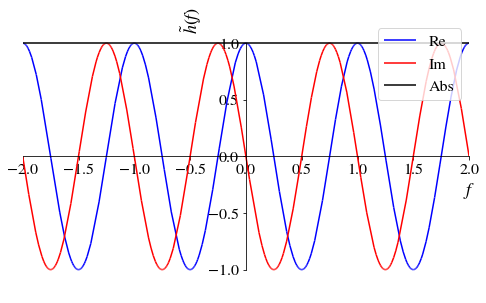

In [7]:
T=1
p1 = plot(re(exp(-2*I*pi*f*T)),im(exp(-2*I*pi*f*T)), abs(exp(-2*I*pi*f*T)),(f,-2/T,2/T), show=False)
p1[0].line_color = 'b' ; p1[1].line_color = 'r' ; p1[2].line_color = 'black'
p1[0].label = 'Re' ; p1[1].label = 'Im' ; p1[2].label = 'Abs' ; p1.legend = True
p1.xlabel = r'$f$' ; p1.ylabel = r"$\tilde h(f)$" ; 
p1.ylim = [-1.2,1.2]
p1.show()

### 2. Constant signal
For a signal with a constant value in time $h(t)=C$, the Fourier transform is 
$$\boxed{\tilde h(f)=\int_{-\infty}^{\infty} C e^{-i 2 \pi f t} d t = C\cdot\delta(f)}$$
and the inverse transform is
$$ h(t)=\int_{-\infty}^{\infty} C\cdot\delta(f) e^{i 2 \pi f t} d f = C$$

In [8]:
inverse_fourier_transform(C*DiracDelta(f),f,t)

### 3. Unit Rectangular signal
A rectangular signal ${\rm rect}(t)$ with amplitude 1 between $-1/2 \leq t \leq 1/2$ can be defined as follows:

In [9]:
class rect(Function):

    @classmethod
    def eval(cls, arg):
        return Heaviside(arg + S.Half) - Heaviside(arg - S.Half)

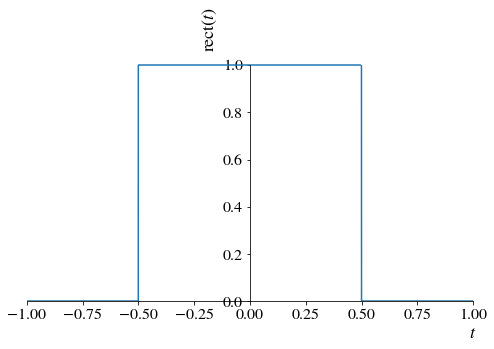

In [10]:
p2 = plot(rect(t),(t,-1,1), show=False) 
p2.xlabel = r'$t$'; p2.ylabel = r"${\rm rect}(t)$" 
p2.ylim = [0,1.15]
p2.show()

The Fourier transform of the reactangular signal is the *cardinal sine* (sinc) fuction
$$
\boxed{ \int_{-\infty}^{\infty} \mathrm{rect}(t) e^{-i 2\pi f t} d t= \frac{\sin (\pi f)}{\pi f}:= \mathrm{sinc}(\pi f)}
$$

In [11]:
fourier_transform(rect(t),t,f)

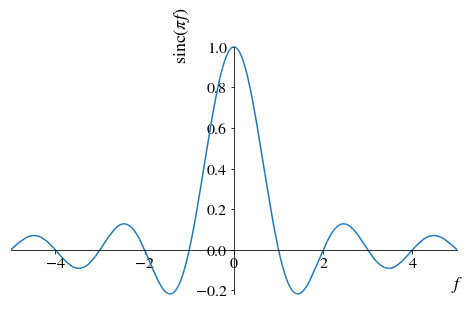

In [12]:
p3 = plot(sinc(pi*f),(f,-5,5), show=False)
p3.xlabel = r'$f$'; p3.ylabel = r"${\rm sinc}(\pi f)$" 
p3.show()

The sinc$(\pi f)$ function is defined as 
$$ \mathrm{sinc}(\pi f):= \frac{\sin(\pi f)}{\pi f}$$
with the property 
$$\int_{-\infty}^{\infty} \text{sinc}(\pi f) \; df = 1$$
and its zeros are located at the integers $n=1,2,3,...$

The inverse Fourier transform of the rectangular signal is 
$$
\int_{-\infty}^{\infty} \mathrm{sinc}(\pi f)  e^{i 2\pi f t} df = \mathrm{rect}(t)
$$

####  Warning: 
the current version of Sympy seems to give a wrong result (the transform should be an even function around the origin, not an odd function):

In [13]:
iftrec = inverse_fourier_transform(sinc(pi*f),f,t)
display(iftrec)

⎧│t│       1      
⎪───  for ──── > 1
⎪ t          2    
⎨         4⋅t     
⎪                 
⎪ 0    otherwise  
⎩                 

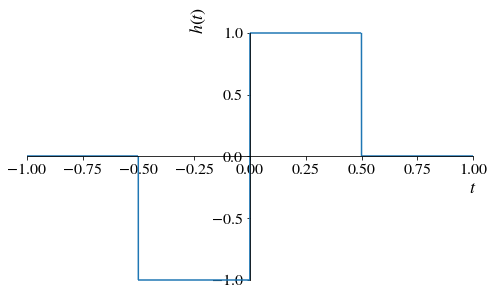

In [14]:
p4 = plot(iftrec,(t,-1,1), show=False)
p4.xlabel = r'$t$'; p4.ylabel = r"$h(t)$" 
p4.show()

### 4. Sine and Cosine Signals

The Fourier transform of a sine signal with frequency $f_0$ is
$$\boxed{\int_{-\infty}^{\infty} sin(2\pi f_0 t) e^{-i 2 \pi f t} d t = -\frac{i}{2}\left[\delta\left(f-f_{0}\right)-\delta\left(f+f_{0}\right)\right]}$$
More generally, for a sine signal with arbitrary initial phase $\phi_0$ it is
$$\boxed{\int_{-\infty}^{\infty} sin(2\pi f_0 t+\phi_0) e^{-i 2 \pi f t} d t = -\frac{i}{2} 
e^{-i\phi_0}\left[ e^{2i\phi_0}\delta\left(f-f_{0}\right)-\delta\left(f+f_{0}\right)\right]}$$
For $\phi_0=\pi/2$ this becomes a cosine signal, with Fourier transform
$$\boxed{\int_{-\infty}^{\infty} cos(2\pi f_0 t) e^{-i 2 \pi f t} d t = \frac{1}{2}\left[\delta\left(f-f_{0}\right)+\delta\left(f+f_{0}\right)\right]}$$


In [15]:
f0=10

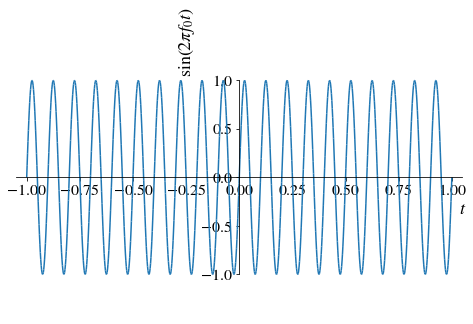

In [16]:
p5 = plot(sin(2*pi*f0*t),(t,-1,1), show=False, adaptive=False,nb_of_points=1000)
p5.xlabel = r'$t$'; p5.ylabel = r"${\rm sin}(2\pi f_0t)$" 
p5.xlim = [-1.05,1.05] ; p5.ylim = [-1.4,1.4]
p5.show()

#### Be careful

Neither Sympy's fourier_transform, nor direct integration using the definition gives the correct result (it is missing the infinite value at $f_0$)

In [17]:
ftsin = fourier_transform(sin(2*pi*f0*t),t,f)
display(ftsin)

In [18]:
integrate( sin(2*pi*f0*t)*exp(-I*2*pi*f*t), (t, -oo, oo) )

⎧              0                for π > │2⋅arg(f) - π│ ∧ π > │2⋅arg(f) + π│
⎪                                                                          
⎪∞                                                                         
⎪⌠                                                                         
⎨⎮   -2⋅ⅈ⋅π⋅f⋅t                                                            
⎪⎮  ℯ          ⋅sin(20⋅π⋅t) dt                   otherwise                 
⎪⌡                                                                         
⎪-∞                                                                        
⎩                                                                          

### 5. Unit Rectangular window

The unit rectangular window is simply ${\rm rect}(t)$ with amplitude 1 between $-1/2 \leq t \leq 1/2$.

Multiplying a sine function with the unit rectangular window gives a boxed sine singal that is suddenly turned on and turned off.

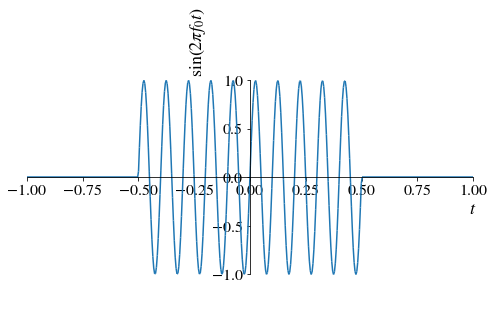

In [19]:
p6 = plot(sin(2*pi*f0*t)*rect(t),(t,-1,1), show=False, adaptive=False, nb_of_points=500)
p6.xlabel = r'$t$'; p6.ylabel = r"${\rm sin}(2\pi f_0t)$" 
p6.xlim = [-1,1] ; p6.ylim = [-1.4,1.4]
p6.show()

The Fourier transform of the boxed sine signal is 
$$\boxed{\int_{-\infty}^{\infty} sin(2\pi f_0 t)\, {\rm rec}(t)\, e^{-i 2 \pi f t} d t = -\frac{i}{2}\left[{\rm sinc}\left(\pi(f-f_{0})\right)-{\rm sinc}\left(\pi(f+f_{0})\right)\right]}$$
(notice that sympy gives another result that is mathematically equivalent).

In [20]:
ftrect = -(1/2)*I*( sinc(pi*(f-f0)) - sinc(pi*(f+f0)) )

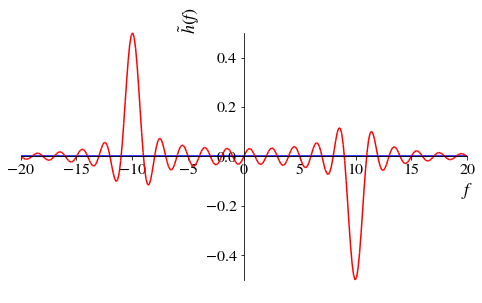

In [21]:
p7 = plot( re(ftrect), im(ftrect), (f,-2*f0,2*f0), show=False, adaptive=False)
p7[0].line_color = 'b' ; p7[1].line_color = 'r' 
p7[0].label = 'Re' ; p7[1].label = 'Im' ;  p1.legend = True
p7.xlabel = r'$f$' ; p7.ylabel = r"$\tilde h(f)$" ; 
p7.show()

The *magnitude* of the Fourier transform is

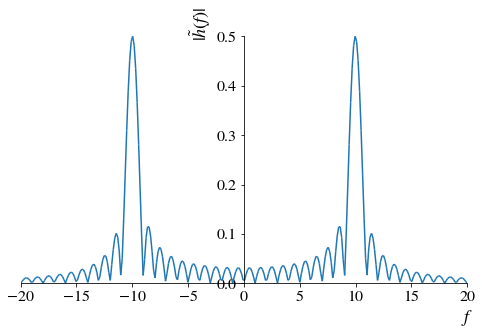

In [22]:
p8 = plot( abs(ftrect) , (f,-2*f0,2*f0), show=False, adaptive=False)
p8.xlabel = r'$f$'; p8.ylabel = r"$|\tilde h (f)|$" 
p8.show()

and the *phase* of the Fourier transform is

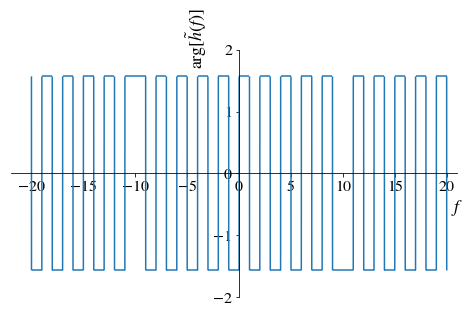

In [23]:
p9 = plot( arg(ftrect), (f,-2*f0,2*f0), show=False)
p9.xlabel = r'$f$'; p9.ylabel = r"${\rm arg}[\tilde h (f)]$"
p9.xlim = [-2*(f0+1),2*f0+1] ; p9.ylim = [-2.2,2.2]
p9.show()

For real signals, it is sufficient to display only the positive frequency values. A logarithmic plot of the Fourier magnitude is then

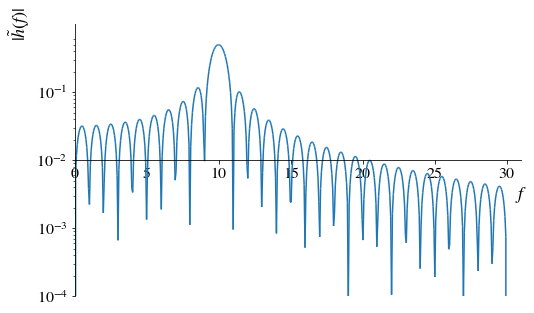

In [24]:
p10 = plot( abs(ftrect), (f,0,3*f0), show=False, adaptive=False, nb_of_points=500)
p10.xlabel = r'$f$'; p10.ylabel = r"$|\tilde h (f)|$"
p10.yscale = 'log' ; p10.xlim = [0,3*f0+1]; p10.ylim = [1e-4,1]
p10.show()

The more general boxed sine function, with an *arbitray initial phase* $\phi_0$, the Fourier transform is 
$$\boxed{\int_{-\infty}^{\infty} sin(2\pi f_0 t+\phi_0)\, {\rm rec}(t)\, e^{-i 2 \pi f t} d t = \frac{1}{2}[\cos(\phi_0)-i\,\sin(\phi_0)] 
\left[    (\sin(2\phi_0)-i\,\cos(2\phi_0))\,
{\rm sinc}\left(\pi(f-f_{0})\right)+i\,{\rm sinc}\left(\pi(f+f_{0}\right))\right]}$$

In [25]:
ftrecta = (1/2)*( cos(a) - I*sin(a) )*( (sin(2*a)-I*cos(2*a))*sinc(pi*(f-f0)) 
                                       + I*sinc(pi*(f+f0)) )

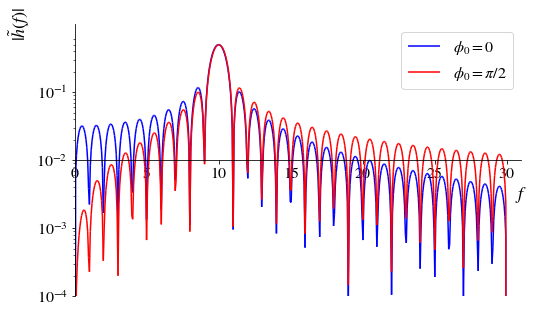

In [26]:
p11 = plot(abs(ftrecta.subs(a,0)), abs(ftrecta.subs(a,pi/2)) ,(f,0,3*f0),show=False,
           adaptive=False, nb_of_points=500)
p11.xlabel = r'$f$'; p11.ylabel = r"$|\tilde h (f)|$" 
p11.yscale = 'log'; p11.xlim = [0,3*f0+1] ; p11.ylim = [1e-4,1]
p11[0].line_color = 'blue' # a=0 => sine
p11[1].line_color = 'red'  # a=pi/2 => cosine
p11[0].label = r'$\phi_0=0$' ; p11[1].label = r'$\phi_0=\pi/2$' ; p11.legend = True
p11.show()

There is less power at low frequencies and more power at high frequencies, for the boxed cosine (red), than for the boxed sine (blue).

### 6. Rectangular window of arbitrary width

A rectangular window with width $b$ has with amplitude 1 between $−b/2\leq t \leq b/2$. 


In [27]:
rectb = rect(t/b)

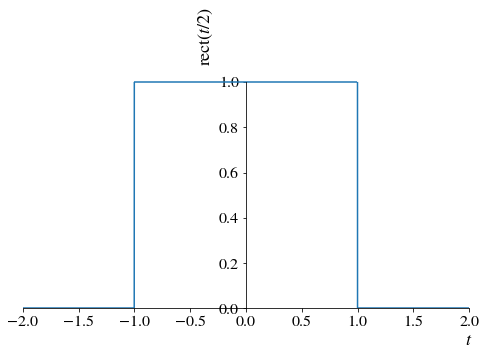

In [28]:
p12 = plot(rectb.subs(b,2),(t,-2,2), show=False)
p12.xlabel = r'$t$'; p12.ylabel = r"${\rm rect}(t/2)$"
p12.ylim = [0,1.2]
p12.show()

Applyling the rectangular window of width $b$ to a sine signal with frequency $f_0$ gives a boxed sine signal of width $b$

In [29]:
sinrectb = rectb*sin(2*pi*f0*t)

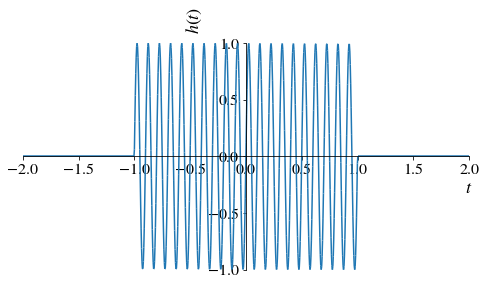

In [30]:
p13 = plot( sinrectb.subs(b,2),(t,-2,2), show=False, adaptive=False, nb_of_points=1000)
p13.xlabel = r'$t$'; p13.ylabel = r"$h(t)$"
p13.ylim = [-1.2,1.2]
p13.show()

For the more general boxed sine function, with an *arbitray initial phase* $\phi_0$ and a width $-b/2\leq t\leq b/2$, the Fourier transform is 
$$\boxed{\int_{-\infty}^{\infty} sin(2\pi f_0 t+\phi_0)\, {\rm rec}(t/b)\, e^{-i 2 \pi f t} d t = \frac{1}{2}|b|[\cos(\phi_0)-i\,\sin(\phi_0)] 
\left[    (\sin(2\phi_0)-i\,\cos(2\phi_0))\,
{\rm sinc}\left(\pi\,b\,(f-f_{0})\right)+i\,{\rm sinc}\left(\pi\,b\,(f+f_{0}\right))\right]}$$

In [31]:
ftrectab = (1/2)*abs(b)*( cos(a) - I*sin(a) )*( (sin(2*a)-I*cos(2*a))*sinc(pi*b*(f-10)) + I*sinc(pi*b*(f+10)) )

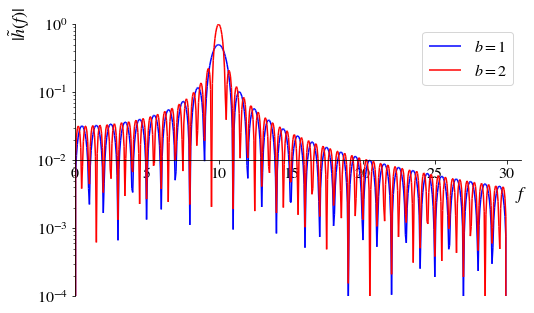

In [32]:
p14 = plot(abs(ftrectab.subs(a,0).subs(b,1)), abs(ftrectab.subs(a,0).subs(b,2)), 
           (f,0,3*f0), show=False, adaptive=False, nb_of_points=500)
p14.xlabel = r'$f$'; p14.ylabel = r"$|\tilde h (f)|$" 
p14.yscale = 'log'; p14.xlim = [0,3*f0+1] ; p14.ylim = [1e-4,1]
p14[0].line_color = 'blue' # a=0 => sine
p14[1].line_color = 'red'  # a=pi/2 => cosine
p14[0].label = r'$b=1$' ; p14[1].label = r'$b=2$' ; p14.legend = True
p14.show()

We see that by increasing the width of the rectangular window, more cycle of the sine signal contribute to the spectrum, increasing the magnitude at the frequency $f_0$. In addition, the width of the spectrum at $f_0$ is now smaller. However, the magnitude of the spectrum at other frequencies is not affected when the signal width changes.

### 6. Lanczos Window

The Lanczos window is simply the ${\rm sinc(\pi t)}$ function between $-1\leq t \leq 1$ and 0 outside this range. 

In [33]:
lanczos = sinc(pi*t)*rect(t/2)

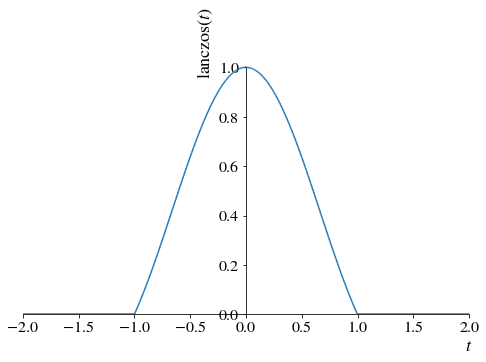

In [34]:
p15 = plot( lanczos,(t,-2,2), show=False, adaptive=False, nb_of_points=500)
p15.xlabel = r'$t$'; p15.ylabel = r"${\rm lanczos}(t)$"
p15.ylim = [0,1.1]
p15.show()

Applying the Lanczos window to the sine signal with frequency $f_0$, we obtain a signal that turns on and off gradually.

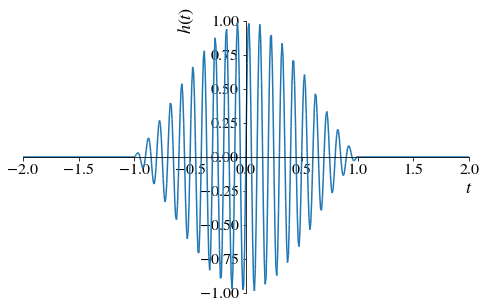

In [35]:
p16 = plot(lanczos*sin(2*pi*f0*t),(t,-2,2), show=False, adaptive=False, nb_of_points=500)
p16.xlabel = r'$t$'; p16.ylabel = r"$h(t)$"
p16.ylim = [-1,1]
p16.show()

The correspongin Fourier transform is
$$\boxed{\int_{-\infty}^{\infty} sin(2\pi f_0 t) \, {\rm sinc(\pi t)} \,{\rm rec}(t/2)\, e^{-i 2 \pi f t} d t = \frac{i}{2\pi}\left[ {\rm Si}(-2\pi(f+f_{0})+\pi) -{\rm Si}(2\pi(f-f_{0})+\pi) - {\rm Si}(-2\pi(f-f_{0})+\pi) +  {\rm Si}(2\pi(f+f_{0})+\pi) \right]}$$
where $Si(z)$ is the *sine integral* function
$$
\mathrm{Si}(z) \equiv \int_{0}^{z} \frac{\sin t}{t} d t
$$

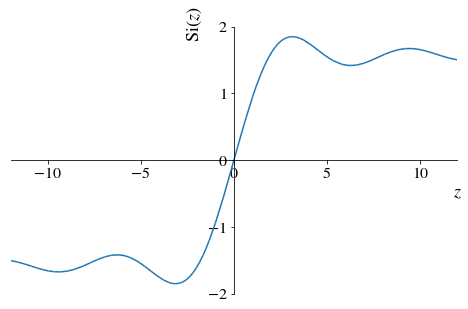

In [36]:
p16 = plot(Si(z),(z,-12,12), show=False)
p16.xlabel = r'$z$'; p16.ylabel = r"${\rm Si}(z)$"
p16.show()

In [37]:
ftLanczos = (I/2)*( Si(-2*pi*(f+f0)+pi) - Si(2*pi*(f-f0)+pi) 
                   - Si(-2*pi*(f-f0)+pi) + Si(2*pi*(f+f0)+pi) )

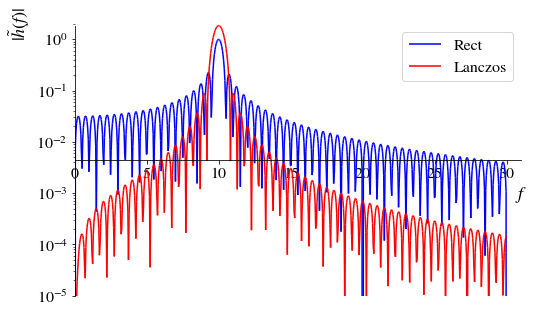

In [38]:
p15 = plot(abs(ftrectab.subs(a,0).subs(b,2)), abs(ftLanczos), (f,0,30), 
           show=False, adaptive=False, nb_of_points=700)
p15.xlabel = r'$f$'; p15.ylabel = r"$|\tilde h (f)|$" 
p15.yscale = 'log'; p15.xlim = [0,3*f0+1] ; p15.ylim = [1e-5,2]
p15[0].line_color = 'blue' ; p15[1].line_color = 'red'   
p15[0].label = 'Rect' ; p15[1].label = 'Lanczos' ; p15.legend = True  
p15.show()

The application of the Lanczos window enhances the main frequency peak and suppresses the magnitude at other frequencies, but the width of the main peak is larger.

### 7. Welch window

The Welch window is the simple qudratic function $1-t^2$ in the range $-1\leq t\leq 1$ and 0 otherwise.

In [39]:
welch = (1-t**2)*rect(t/2)

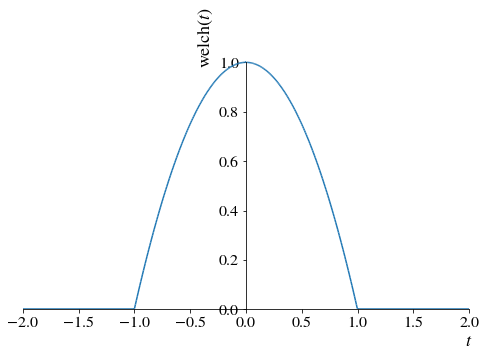

In [40]:
p16 = plot(welch, (t,-2,2), show=False, adaptive=False, nb_of_points=500)
p16.xlabel = r'$t$'; p16.ylabel = r"${\rm welch}(t)$"
p16.ylim = [0,1.1]
p16.show()

Applying the Welch window to the sine signal with frequency $f_0$, we obtain a signal that turns on and off gradually.

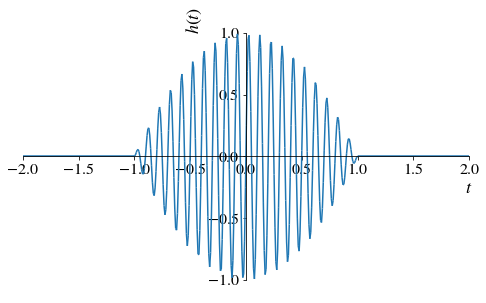

In [41]:
p17 = plot(sin(2*pi*f0*t)*welch,(t,-2,2), show=False, adaptive=False, nb_of_points=500)
p17.xlabel = r'$t$'; p17.ylabel = r'$h(t)$'
p17.ylim = [-1.1,1.1]
p17.show()

The corresponding Fourier transform is
$$\boxed{\int_{-\infty}^{\infty} sin(2\pi f_0 t) \, {\rm rec}(t/2)(1-t^2)\, e^{-i 2 \pi f t} d t = -i \sqrt{\frac{\pi}{2}}\left[\frac{-4 \sin (2 \pi (f-f_0))-8 \pi (f_0-f) \cos (2 \pi (f-f_0))}{(2 \pi)^{7/2}(f_0-f)^{3}}\right. +\left.\frac{-4 \sin (2 \pi (f+f_0))+8 \pi (f_0+f) \cos (2 \pi (f+f_0))}{(2 \pi)^{7/2}(f_0+f)^{3}}\right]
}$$


In [42]:
ftWelch = -I*pow(pi/2,1/2)*( (-4*sin(2*pi*(f-f0)) - 8*pi*(f0-f)*cos(2*pi*(f-f0)) )/(pow(2*pi,7/2)*pow((f0-f),3) ) +
                       (-4*sin(2*pi*(f+f0)) + 8*pi*(f+f0)*cos(2*pi*(f+f0)) )/(pow(2*pi,7/2)*pow((f0+f),3) ))

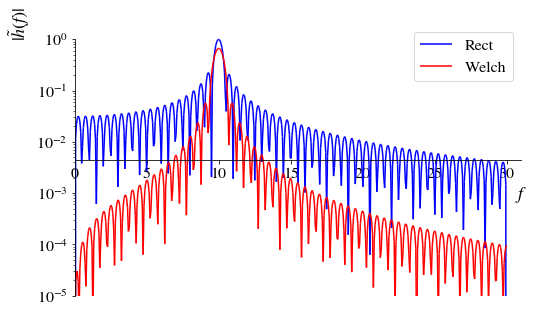

In [43]:
p18 = plot(abs(ftrectab.subs(a,0).subs(b,2)), abs(ftWelch), (f,0,30), 
           show=False, adaptive=False, nb_of_points=500)
p18.xlabel = r'$f$'; p18.ylabel = r"$|\tilde h (f)|$" 
p18.yscale = 'log'; p18.xlim = [0,3*f0+1] ; p18.ylim = [1e-5,2]
p18[0].line_color = 'blue' ; p18[1].line_color = 'red'   
p18[0].label = 'Rect' ; p18[1].label = 'Welch' ; p18.legend = True  
p18.show()

The application of the Welch window suppresses the magnitude at other frequencies and maintains the same width of the main peak, but the magnitude of the main peak is smaller.

### 8. Sine Window

The sine window is simply the function $\sin(\pi(1-t)/2)$ in the range $-1\leq t\leq 1$ and 0 otherwise.

In [44]:
sinewindow = sin(pi*(1-t)/2)*rect(t/2)

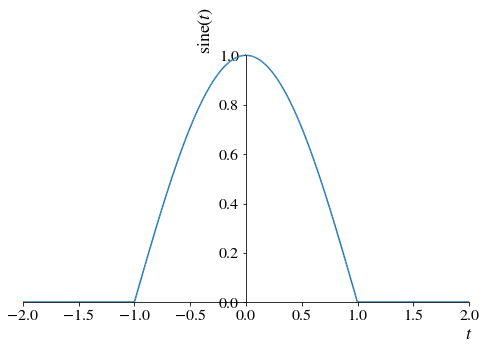

In [45]:
p19 = plot(sinewindow, (t,-2,2), show=False, adaptive=False, nb_of_points=500)
p19.xlabel = r'$t$'; p19.ylabel = r"${\rm sine}(t)$"
p19.ylim = [0,1.1]
p19.show()

Applying the Sine window to the sine signal with frequency $f_0$, we obtain a signal that turns on and off gradually.

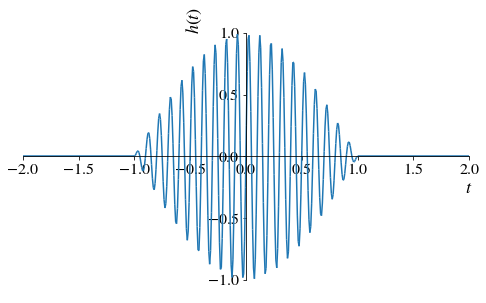

In [46]:
p20 = plot(sinewindow*sin(2*pi*10*t), (t,-2,2), show=False, adaptive=False, nb_of_points=500)
p20.xlabel = r'$t$'; p20.ylabel = r'$h(t)$'
p20.ylim = [-1.1,1.1] 
p20.show()

With corresponding Fourier transform 
$$\boxed{\int_{-\infty}^{\infty} sin(2\pi f_0 t) \, {\rm rec}(t/2)(1-t^2)\, e^{-i 2 \pi f t} d t = \frac{1}{2} i\left[-\operatorname{sinc}\left(\frac{1}{2} \pi(4 (f-f_0)+1)\right)-\operatorname{sinc}\left(\frac{1}{2} \pi(-4 (f-f_0)+1)\right)\right. +\left.\operatorname{sinc}\left(\frac{1}{2} \pi(4 (f+f_0)-1)\right)+\operatorname{sinc}\left(\frac{1}{2} \pi(4 (f+f_0)+1)\right)\right]
}$$

In [47]:
ftSine = (I/2)*( -sinc(pi/2*(4*(f-f0)+1))-sinc(pi/2*(-4*(f-f0)+1)) 
                +sinc(pi/2*(4*(f+f0)-1)) +sinc(pi/2*(4*(f+f0)+1)))

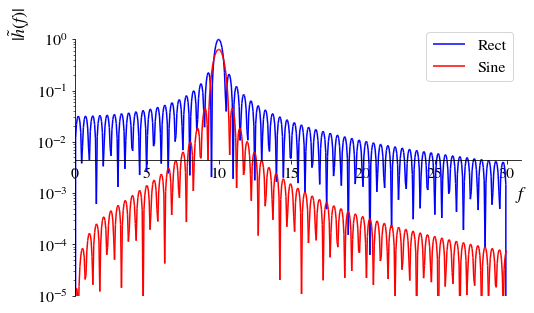

In [48]:
p21 = plot(abs(ftrectab.subs(a,0).subs(b,2)), abs(ftSine), (f,0,30), 
           show=False, adaptive=False, nb_of_points=500)
p21.xlabel = r'$f$'; p21.ylabel = r"$|\tilde h (f)|$" 
p21.yscale = 'log'; p21.xlim = [0,3*f0+1] ; p21.ylim = [1e-5,2]
p21[0].line_color = 'blue' ; p21[1].line_color = 'red'   
p21[0].label = 'Rect' ; p21[1].label = 'Sine' ; p21.legend = True  
p21.show()

## 9. SUMMARY

The four different window are shown together in the following plot

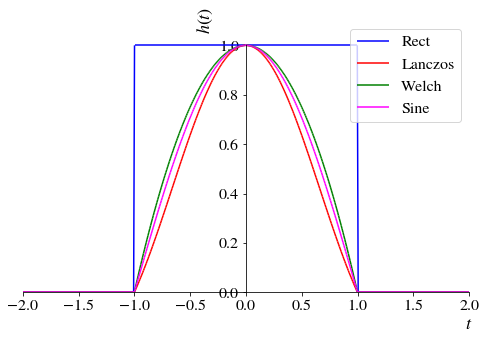

In [49]:
p22 = plot(rect(t/2), lanczos, welch, sinewindow, (t,-2,2), show=False, 
           adaptive=False, nb_of_points=500)
p22.xlabel = r'$t$'; p22.ylabel = r"$h(t)$"
p22[0].line_color = 'blue' ; p22[1].line_color = 'red'; p22[2].line_color = 'green' 
p22[3].line_color = 'magenta'  
p22[0].label = 'Rect' ; p22[1].label = 'Lanczos' ; p22[2].label = 'Welch' 
p22[3].label = 'Sine' ; p22.legend = True  
p22.ylim = [0,1.1]
p22.show()

The corresponding Fourier transforms are shown together in the following plot

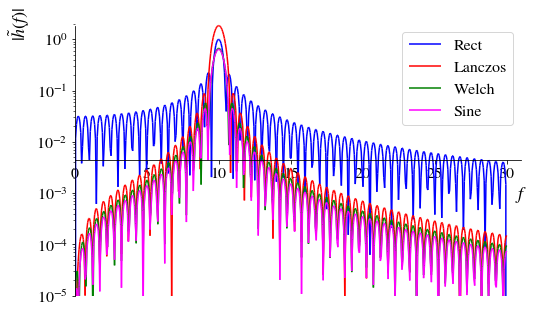

In [50]:
p23 = plot(abs(ftrectab.subs(a,0).subs(b,2)), abs(ftLanczos), abs(ftWelch), abs(ftSine), (f,0,30), 
           show=False, adaptive=False, nb_of_points=500)
p23.xlabel = r'$f$'; p23.ylabel = r"$|\tilde h (f)|$" 
p23.yscale = 'log'; p23.xlim = [0,3*f0+1] ; p23.ylim = [1e-5,2]
p23[0].line_color = 'blue' ; p23[1].line_color = 'red'; p23[2].line_color = 'green' 
p23[3].line_color = 'magenta'
p23[0].label = 'Rect' ; p23[1].label = 'Lanczos' ; p23[2].label = 'Welch' 
p23[3].label = 'Sine' ; p23.legend = True  
p23.show()